# Carga de datos

In [2]:
import os

# URL del archivo en GitHub
url_archivo_github = 'https://raw.githubusercontent.com/SekDak12/Proyecto-Ciencia/main/2023%20QS.csv'

# Ruta donde se guardará el archivo descargado
ruta_guardado = '2023 QS.csv'

# Comando para descargar usando wget
comando_wget = f'wget {url_archivo_github} '

# Ejecutar el comando para descargar
os.system(comando_wget)

0

In [3]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

df = pd.read_csv ("2023 QS.csv")
df

df1 = pd.read_csv ("2023 QS.csv")


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421
Rank,1,2,3,4,5,6,7,8,9,10,...,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422
institution,Massachusetts Institute of Technology (MIT),University of Cambridge,Stanford University,University of Oxford,Harvard University,California Institute of Technology (Caltech),Imperial College London,UCL,ETH Zurich - Swiss Federal Institute of Techno...,University of Chicago,...,Universidad Católica de Santiago de Guayaquil,Universidad Católica de Temuco,Universidad de Tarapaca,Universidad Mayor de San Simón Cochabamba,Universidad Michoacana de San Nicolás de Hidalgo,Universidad Nacional Autónoma de Honduras (UNAH),Universidad Tecnológica de Bolívar,Université Mohammed V de Rabat,University of Craiova,University of Oradea
location code,US,UK,US,UK,US,US,UK,UK,CH,US,...,EC,CL,CL,BO,MX,HN,CO,MA,RO,RO
location,United States,United Kingdom,United States,United Kingdom,United States,United States,United Kingdom,United Kingdom,Switzerland,United States,...,Ecuador,Chile,Chile,Bolivia,Mexico,Honduras,Colombia,Morocco,Romania,Romania
ar score,100.0,100.0,100.0,100.0,100.0,96.5,98.3,99.4,98.6,99.2,...,3.4,3.1,3.3,3.6,3.4,4.6,3.0,2.8,3.3,4.0
ar rank,5,2,4,3,1,28,24,14,18,16,...,501+,501+,501+,501+,501+,501+,501+,501+,501+,501+
er score,100.0,100.0,100.0,100.0,100.0,87.1,99.7,98.6,91.3,92.2,...,7.5,1.4,3.0,3.3,2.3,5.8,5.8,2.6,1.8,2.1
er rank,4,2,5,3,1,58,10,16,51,46,...,501+,501+,501+,501+,501+,501+,501+,501+,501+,501+
fsr score,100.0,100.0,100.0,100.0,99.4,100.0,99.5,97.6,74.2,92.9,...,2.8,2.1,1.9,1.2,2.8,3.6,2.4,3.2,2.7,3.3
fsr rank,14,11,6,8,35,3,34,51,164,71,...,601+,601+,601+,601+,601+,601+,601+,601+,601+,601+


# Limpieza nueva

In [5]:
##
## Nueva Limpieza
##

df1= df.drop("ar rank", axis=1)
df2= df1.drop("er rank", axis=1)
df3= df2.drop("fsr rank", axis=1)
df4= df3.drop("cpf rank", axis=1)
df5= df4.drop("ifr rank", axis=1)
df6= df5.drop("irn rank", axis=1)
df7= df6.drop("isr rank", axis=1)
dfclean= df7.drop("ger rank", axis=1)


dfclean

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,100
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,98.8
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,98.4
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.7,NaN,8.1,NaN,-
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.3,1.3,8.8,30.9,-
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.2,2.8,51.1,NaN,-
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,NaN,NaN,7.5,8.7,-


In [6]:
valor_a_contar = "-"
conteo = (df['score scaled'] == valor_a_contar).sum()
print(conteo)



922


In [7]:
#Vamos a tratar de eliminar un inconveniente con el dato df['score scaled'] = df['score scaled'].astype(float) ya que, este dato oriinalmente
#Se trata de un sting con elements - que seran reemplados y el dominio del resto de datos es de  24.2 a 100, estos se reemplazaran con 0

dfclean['score scaled'] = dfclean["score scaled"].replace(["-"],[0] )
dfclean['score scaled'] = dfclean['score scaled'].astype(float)

##
## Se arreglo dicho error creando un modelo de regresion en las secciones adelante
##

In [8]:
dfclean.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
er score          1
fsr score         2
cpf score         5
ifr score        98
isr score        57
irn score        13
ger score        12
score scaled      0
dtype: int64

In [9]:
#Los NaN en er score, fsr score, cpf score al contar con una menor cantidad de NaNs se reemplazaran como 0.

dfclean['er score'].fillna(0, inplace=True)
dfclean['fsr score'].fillna(0, inplace=True)
dfclean['cpf score'].fillna(0, inplace=True)

#Los Nan con respecto a ifr, isr, irn seran transformados por las media de sus datos, ya que estos se encuentran
#Relacionados con la falta de informacion de la colaboraciones internacionales de las universidades

media_ifr = dfclean['ifr score'].mean()
dfclean['ifr score'].fillna(media_ifr, inplace=True)

media_isr = dfclean['isr score'].mean()
dfclean['isr score'].fillna(media_isr, inplace=True)

media_irn = dfclean['irn score'].mean()
dfclean['irn score'].fillna(media_irn, inplace=True)

media_ger = dfclean['ger score'].mean()
dfclean['ger score'].fillna(media_ger, inplace=True)

In [10]:
dfclean

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,100.0
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,98.8
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,98.4
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,0.0
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,0.0
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,0.0
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,0.0


# Seleccion de variables mas relevantes al Rank.

---



In [ ]:
dfclean
dfclean1 = dfclean.drop(["institution"], axis=1)
dfclean1 = dfclean1.drop(["location code"], axis=1)
dfclean1 = dfclean1.drop(["location"], axis=1)
dfclean1 = dfclean1.drop(["score scaled"], axis=1)

dfclean2 = dfclean1.drop(["Rank"], axis=1)
dfclean2

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000
1,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000
2,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000
3,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000
4,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000
...,...,...,...,...,...,...,...,...
1417,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809
1418,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000
1419,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809
1420,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2



x = dfclean1['Rank']
k = 1  # número de atributos a seleccionar
entrenar = dfclean1.drop(['Rank'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(chi2, k=k).fit(entrenar, x)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos


## ['ifr score', 'isr score', 'irn score', 'ger score']   con chi2
## ['er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']

## ['ifr score', 'isr score', 'irn score', 'ger score'] por f classi
## ['cpf score', 'ifr score', 'isr score', 'irn score', 'ger score']
## ['cpf score', 'ifr score', 'isr score']
## ['ifr score', 'isr score']



['isr score']

In [ ]:
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.ensemble import ExtraTreesClassifier #decision trees randoms randoms

modelo = ExtraTreesClassifier()
erec = RFE(modelo)
erec = erec.fit(entrenar, x)
atrib = erec.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

## ['er score', 'fsr score', 'cpf score', 'irn score'] Por metodo recursivo

['er score', 'fsr score', 'irn score', 'ger score']

# Seccion de graficacion

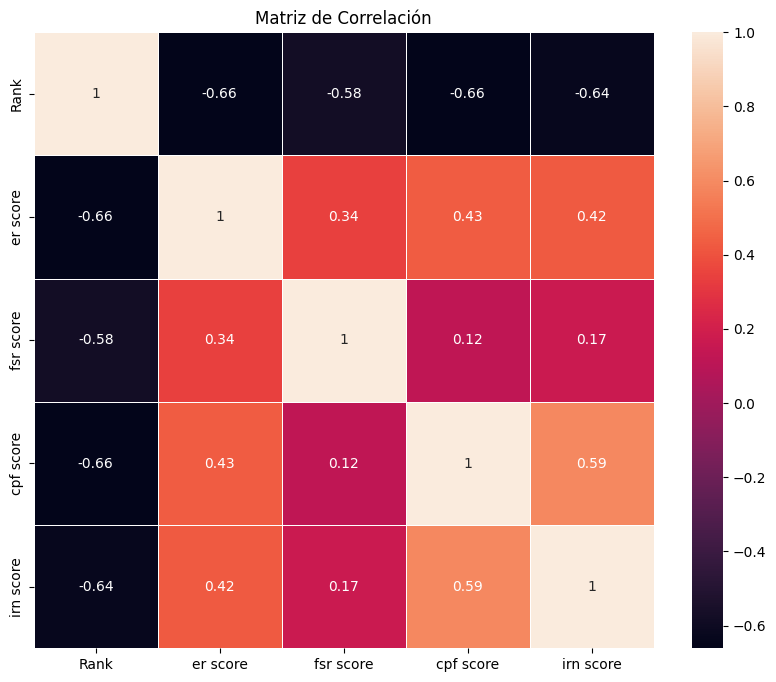

In [ ]:


dfcleanp = dfclean1.drop(["ar score"], axis=1)

dfcleanp = dfcleanp.drop(["ifr score"], axis=1)
dfcleanp = dfcleanp.drop(["ger score"], axis=1)
dfcleanp = dfcleanp.drop(["isr score"], axis=1)
 # Calcula la matriz de correlación
correlation_matrix = dfcleanp.corr()

# Visualiza la  matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

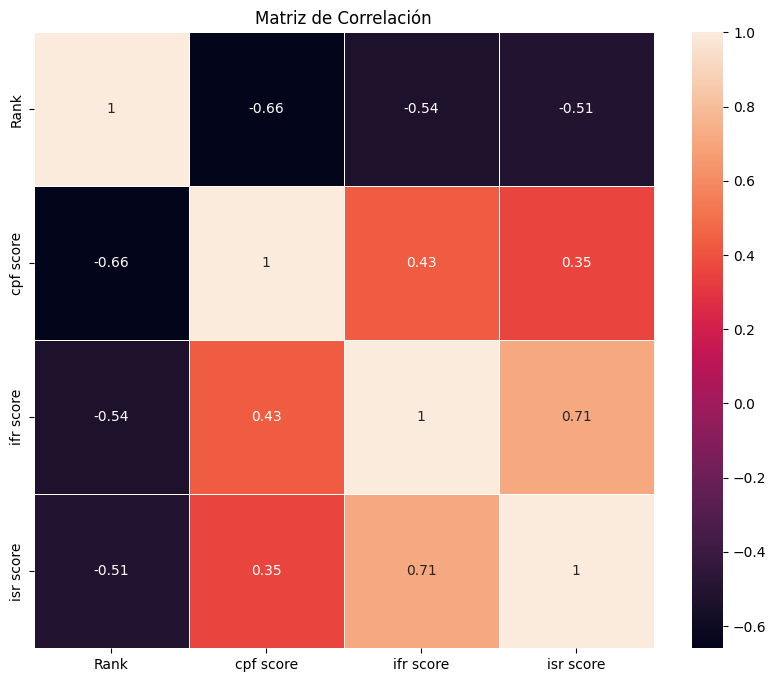

In [ ]:

dfcleanp1 = dfclean1.drop(["ar score"], axis=1)
dfcleanp1 = dfcleanp1.drop(["er score"], axis=1)

dfcleanp1 = dfcleanp1.drop(["irn score"], axis=1)
dfcleanp1 = dfcleanp1.drop(["ger score"], axis=1)
dfcleanp1 = dfcleanp1.drop(["fsr score"], axis=1)
'cpf score'
dfcleanp2 = dfcleanp1.drop(['cpf score'], axis=1)

 # Calcula la matriz de correlación
correlation_matrix = dfcleanp1.corr()

# Visualiza la  matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
dfcleanp1.head()

,Rank,cpf score,ifr score,isr score
0,1,100.0,100.0,90.0
1,2,92.3,100.0,96.3
2,3,99.9,99.8,60.3
3,4,90.0,98.8,98.4
4,5,100.0,76.9,66.9


In [ ]:
dfcleanp2.head()

,Rank,ifr score,isr score
0,1,100.0,90.0
1,2,100.0,96.3
2,3,99.8,60.3
3,4,98.8,98.4
4,5,76.9,66.9


# Clasificacion mediante algoritmo CART en arboles de decision.
# *Accuracy .78*

In [ ]:
# dfcleanp1 Para 3 carac
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos y realizar preprocesamiento básico si es necesario
# Suponiendo que tienes un DataFrame df con tus datos
# ...

# Definir intervalos y etiquetas
intervalos = [1, 350, 700, 1050, float('inf')]  # Define tus intervalos según tus criterios
etiquetas = ['Excelentes', 'Buen nivel', 'Mah o meno', 'Regular']  # Define las etiquetas para cada intervalo

# Crear la variable objetivo basada en los intervalos
dfcleanp1['clasificacion'] = pd.cut(dfcleanp1['Rank'], bins=intervalos, labels=etiquetas)

# Codificar la variable objetivo ('clasificacion')
le = LabelEncoder()
dfcleanp1['label'] = le.fit_transform(dfcleanp1['clasificacion'])
X= dfcleanp1[["cpf score", "ifr score", "isr score"]]
y = dfcleanp1['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisiones
decision_tree = DecisionTreeClassifier( criterion='entropy')
decision_tree.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_dt = decision_tree.predict(X_test)

# Evaluar el modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Precisión:", accuracy_dt)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_dt))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_dt))


Precisión: 0.43508771929824563
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.30      0.32      0.31        72
           1       0.47      0.60      0.52        67
           2       0.35      0.30      0.33        69
           3       0.65      0.52      0.58        77

    accuracy                           0.44       285
   macro avg       0.44      0.44      0.43       285
weighted avg       0.44      0.44      0.44       285

Matriz de confusión:
[[23 27 15  7]
 [20 40  6  1]
 [20 14 21 14]
 [14  5 18 40]]


In [ ]:
dfcleanp1

,Rank,cpf score,ifr score,isr score,clasificacion,label
0,1,100.0,100.000000,90.000000,NaN,4
1,2,92.3,100.000000,96.300000,Excelentes,1
2,3,99.9,99.800000,60.300000,Excelentes,1
3,4,90.0,98.800000,98.400000,Excelentes,1
4,5,100.0,76.900000,66.900000,Excelentes,1
...,...,...,...,...,...,...
1417,1418,1.0,1.700000,26.545348,Regular,3
1418,1419,2.2,9.300000,1.300000,Regular,3
1419,1420,3.6,5.200000,2.800000,Regular,3
1420,1421,2.0,31.659517,26.545348,Regular,3


In [ ]:
# para 2 variable dfcleanp2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos y realizar preprocesamiento básico si es necesario
# Suponiendo que tienes un DataFrame df con tus datos
# ...

# Definir intervalos y etiquetas
intervalos = [1, 50, 150, 300, float('inf')]  # Define tus intervalos según tus criterios
etiquetas = ['Excelentes', 'Buen nivel', 'Mah o meno', 'Regular']  # Define las etiquetas para cada intervalo

# Crear la variable objetivo basada en los intervalos
dfcleanp2['clasificacion'] = pd.cut(dfcleanp2['Rank'], bins=intervalos, labels=etiquetas)

# Codificar la variable objetivo ('clasificacion')
le = LabelEncoder()
dfcleanp2['label'] = le.fit_transform(dfcleanp2['clasificacion'])

X1 = dfcleanp2[['ifr score', 'isr score']]
y1 = dfcleanp2['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisiones
decision_tree = DecisionTreeClassifier( criterion='entropy')
decision_tree.fit(X_train1, y_train1)

# Predecir en el conjunto de prueba
y_pred_dt1 = decision_tree.predict(X_test1)

# Evaluar el modelo
accuracy_dt2 = accuracy_score(y_test, y_pred_dt1)
print("Precisión:", accuracy_dt2)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test1, y_pred_dt1))

print("Matriz de confusión:")
print(confusion_matrix(y_test1, y_pred_dt1))

Precisión: 0.3263157894736842
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.22      0.26      0.24        19
           1       0.27      0.50      0.35         8
           2       0.27      0.23      0.25        31
           3       0.87      0.85      0.86       227

    accuracy                           0.73       285
   macro avg       0.41      0.46      0.42       285
weighted avg       0.75      0.73      0.74       285

Matriz de confusión:
[[  5   2   1  11]
 [  2   4   0   2]
 [  7   2   7  15]
 [  9   7  18 193]]


# Clasificacion por modelo de regresion logistica

In [ ]:
#Para 3 caracteristicas.

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
# Predecir en el conjunto de prueba
y_pred_logistic = logisticRegr.predict(X_test)

# Evaluar el modelo
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Precisión:", accuracy_logistic)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_logistic))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_logistic))




Precisión: 0.5228070175438596
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.49      0.46      0.47        72
           1       0.67      0.75      0.70        67
           2       0.27      0.17      0.21        69
           3       0.56      0.70      0.62        77

    accuracy                           0.52       285
   macro avg       0.49      0.52      0.50       285
weighted avg       0.49      0.52      0.50       285

Matriz de confusión:
[[33 19 11  9]
 [12 50  2  3]
 [20  6 12 31]
 [ 3  0 20 54]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Para 2 caracteristicas

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train1, y_train1)
# Predecir en el conjunto de prueba
y_pred_logistic2 = logisticRegr.predict(X_test1)

# Evaluar el modelo
accuracy_logistic2 = accuracy_score(y_test1, y_pred_logistic2)
print("Precisión:", accuracy_logistic2)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test1, y_pred_logistic2))
y_pred_logistic2
print("Matriz de confusión:")
print(confusion_matrix(y_test1, y_pred_logistic2))



Precisión: 0.7929824561403509
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.19      0.16      0.17        19
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        31
           3       0.83      0.98      0.90       227

    accuracy                           0.79       285
   macro avg       0.25      0.29      0.27       285
weighted avg       0.67      0.79      0.73       285

Matriz de confusión:
[[  3   0   0  16]
 [  3   0   0   5]
 [  6   0   0  25]
 [  4   0   0 223]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

# Clasificacion por Maquinas de vectores de soporte

In [ ]:

from sklearn.svm import SVC

# Entrenar el modelo SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# con kernel Polinomial  Precisión: 0.8280701754385965
# con kernel lineal      Precisión: 0.8175438596491228
# con kernel sigmoid     Precisión: 0.7017543859649122
# con kernel rbf         Precisión: 0.8350877192982457


# Predecir en el conjunto de prueba
y_pred_svm = svm.predict(X_test)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Precisión:", accuracy_svm)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_svm))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_svm))

Precisión: 0.5614035087719298
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.52      0.40      0.45        72
           1       0.73      0.67      0.70        67
           2       0.39      0.25      0.30        69
           3       0.56      0.90      0.69        77

    accuracy                           0.56       285
   macro avg       0.55      0.55      0.54       285
weighted avg       0.55      0.56      0.54       285

Matriz de confusión:
[[29 13 15 15]
 [15 45  4  3]
 [12  4 17 36]
 [ 0  0  8 69]]


In [ ]:
from sklearn.svm import SVC

# Entrenar el modelo SVM
svm = SVC(kernel='rbf')
svm.fit(X_train1, y_train1)

# con kernel Polinomial  Precisión: 0.8280701754385965
# con kernel lineal      Precisión: 0.8175438596491228
# con kernel sigmoid     Precisión: 0.7017543859649122
# con kernel rbf         Precisión: 0.8350877192982457


# Predecir en el conjunto de prueba
y_pred_svm2 = svm.predict(X_test1)

# Evaluar el modelo
accuracy_svm2 = accuracy_score(y_test1, y_pred_svm2)
print("Precisión:", accuracy_svm2)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test1, y_pred_svm2))
y_pred_svm2
print("Matriz de confusión:")
print(confusion_matrix(y_test1, y_pred_svm2))

Precisión: 0.7964912280701755
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        31
           3       0.80      1.00      0.89       227

    accuracy                           0.80       285
   macro avg       0.20      0.25      0.22       285
weighted avg       0.63      0.80      0.71       285

Matriz de confusión:
[[  0   0   0  19]
 [  0   0   0   8]
 [  0   0   0  31]
 [  0   0   0 227]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Seccion de Fitter para Score Scaled Sigmoid

In [ ]:
pip install fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.1 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26058 sha256=8de68274dc1c5519b17e7e8c22505ad7725a91a403220771097f374f364a286c
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depe

In [ ]:
from scipy import stats
from fitter import Fitter

# 80 distribuciones
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']
# Atributo
fitter = Fitter(dfcleanp1["cpf score"], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)




,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.019594,1057.284575,1073.064033,inf,0.089631,2.168003e-10
chi2,0.019848,1068.213680,1083.993139,inf,0.145940,6.762912e-27
expon,0.020926,1052.382933,1062.902572,inf,0.169814,2.557333e-36
exponpow,0.021548,1016.873419,1032.652878,inf,0.139562,1.263872e-24
beta,0.022471,1008.229501,1029.268779,inf,0.114051,1.437532e-16
cauchy,0.024995,1227.533863,1238.053502,inf,0.296399,3.138985e-111
powerlaw,0.032730,1080.311354,1096.090812,inf,0.373416,1.635530e-178
logistic,0.032789,1083.325220,1093.844859,inf,0.221495,9.365104e-62
norm,0.034018,1044.533399,1055.053038,inf,0.196781,1.007110e-48


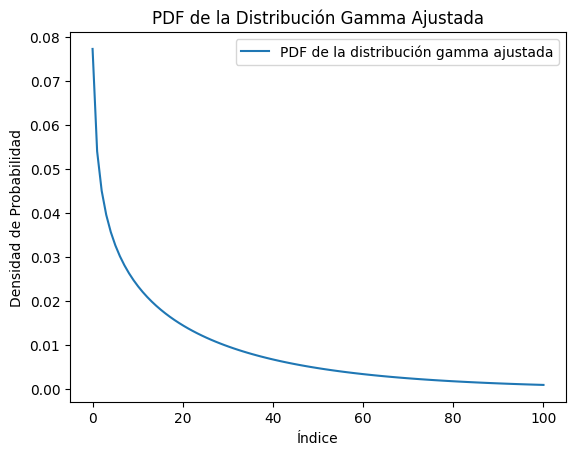

In [ ]:
fitter.fitted_pdf['gamma']

import matplotlib.pyplot as plt
import numpy as np

# Los valores de la función de densidad de probabilidad (PDF)
pdf_values = fitter.fitted_pdf['gamma']


# Crear un arreglo de valores x para la gráfica
x = np.linspace(0, len(pdf_values), len(pdf_values))

# Graficar la PDF
plt.plot(x, pdf_values, label='PDF de la distribución gamma ajustada')
plt.xlabel('Índice')
plt.ylabel('Densidad de Probabilidad')
plt.title('PDF de la Distribución Gamma Ajustada')
plt.legend()
plt.show()


In [ ]:
dfbueno = dfclean.drop("institution", axis=1)
dfbueno = dfbueno.drop("location code", axis=1)
dfbueno = dfbueno.drop("location", axis=1)
dfbueno = dfbueno.drop("score scaled", axis=1)
dfbueno = dfbueno.drop("Rank", axis=1)

dfbueno

In [ ]:

print("La cantidad de paises en el estudio son: ", len(dfclean['location'].unique()))
print("La cantidad de universidades en el estudio son: ", len(dfclean['institution'].unique()))
print("La cantidad de codigos postales en el estudio son: ", len(dfclean['location code'].unique()))


#Analisis Respecto a Mexico

In [ ]:
mx = dfcleanp1[dfclean['location'] == 'Mexico']
columna = 'clasificacion'  # Reemplaza 'nombre_de_tu_columna' por el nombre real de tu columna
mx

,Rank,cpf score,ifr score,isr score,clasificacion,label
104,105,2.9,9.300000,2.600000,Buen nivel,0
169,170,2.2,52.900000,8.600000,Mah o meno,2
401,402,1.5,10.100000,19.800000,Regular,3
546,547,1.2,12.200000,1.400000,Regular,3
636,637,1.1,6.500000,3.500000,Regular,3
730,731,1.3,6.600000,2.600000,Regular,3
764,765,2.8,2.900000,1.200000,Regular,3
765,766,2.0,64.100000,1.700000,Regular,3
784,785,1.4,3.100000,1.400000,Regular,3
845,846,1.0,2.800000,1.600000,Regular,3


In [ ]:
## Busqueda de acuerdo a los parametros de la lista que buscas saber
g = "ger score"
parametro = 99.6
nu = mx[mx[g] == parametro]

print("La informacion que coincide sera ", nu)


La informacion que coincide sera       Rank        institution location code location  ar score  er score  \
401   402  Colegio de México            MX   Mexico      14.9       3.9   

     fsr score  cpf score  ifr score  isr score  irn score  ger score  \
401      100.0        1.5       10.1       19.8        1.7       99.6   

     score_scaled_sigmoid clasificacion  label  
401             26.487256       regular      3  


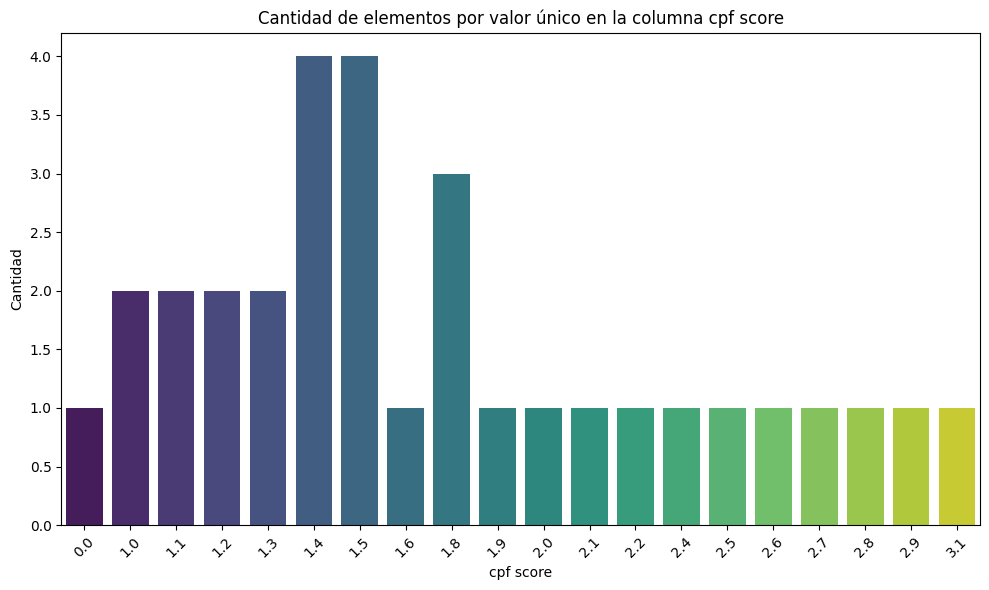

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'mx' es tu DataFrame y 'columna' es la columna que deseas analizar
columna = 'cpf score'  # Reemplaza 'nombre_de_tu_columna' por el nombre real de tu columna

# Calcula la cantidad de elementos para cada valor único en la columna
conteo_valores = mx[columna].value_counts()

# Crea un gráfico de barras para visualizar los conteos
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_valores.index, y=conteo_valores.values, palette='viridis')
plt.xlabel(columna)
plt.ylabel('Cantidad')
plt.title('Cantidad de elementos por valor único en la columna ' + columna)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [ ]:


print("La cantidad de universidades en el estudio en México que son Regulares: ", len(mx[mx['label'] == 3]))

print("La cantidad de universidades en el estudio en mexico que son Malas: ", len(mx[mx['label'] ==2]))

print("La cantidad de universidades en el estudio en mexico que son Excelentes: ", len(mx[mx['label'] ==1]))

print("La cantidad de universidades en el estudio en mexico que son Buenas: ", len(mx[mx['label'] ==0]))



La cantidad de universidades en el estudio en México que son Regulares:  30
La cantidad de universidades en el estudio en mexico que son Malas:  1
La cantidad de universidades en el estudio en mexico que son Excelentes:  0
La cantidad de universidades en el estudio en mexico que son Buenas:  1


[Text(0, 0, '2.9'),
 Text(0, 0, '2.2'),
 Text(0, 0, '1.5'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.3'),
 Text(0, 0, '2.8'),
 Text(0, 0, '2'),
 Text(0, 0, '1.4'),
 Text(0, 0, '1'),
 Text(0, 0, '1.4'),
 Text(0, 0, '1.5'),
 Text(0, 0, '2.7'),
 Text(0, 0, '1.3'),
 Text(0, 0, '1.8'),
 Text(0, 0, '1.9'),
 Text(0, 0, '1.4'),
 Text(0, 0, '1.8'),
 Text(0, 0, '1.5'),
 Text(0, 0, '1.5'),
 Text(0, 0, '2.6'),
 Text(0, 0, '2.5'),
 Text(0, 0, '2.4'),
 Text(0, 0, '1.6'),
 Text(0, 0, '3.1'),
 Text(0, 0, '1.8'),
 Text(0, 0, '1'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.4'),
 Text(0, 0, '0'),
 Text(0, 0, '2.1')]

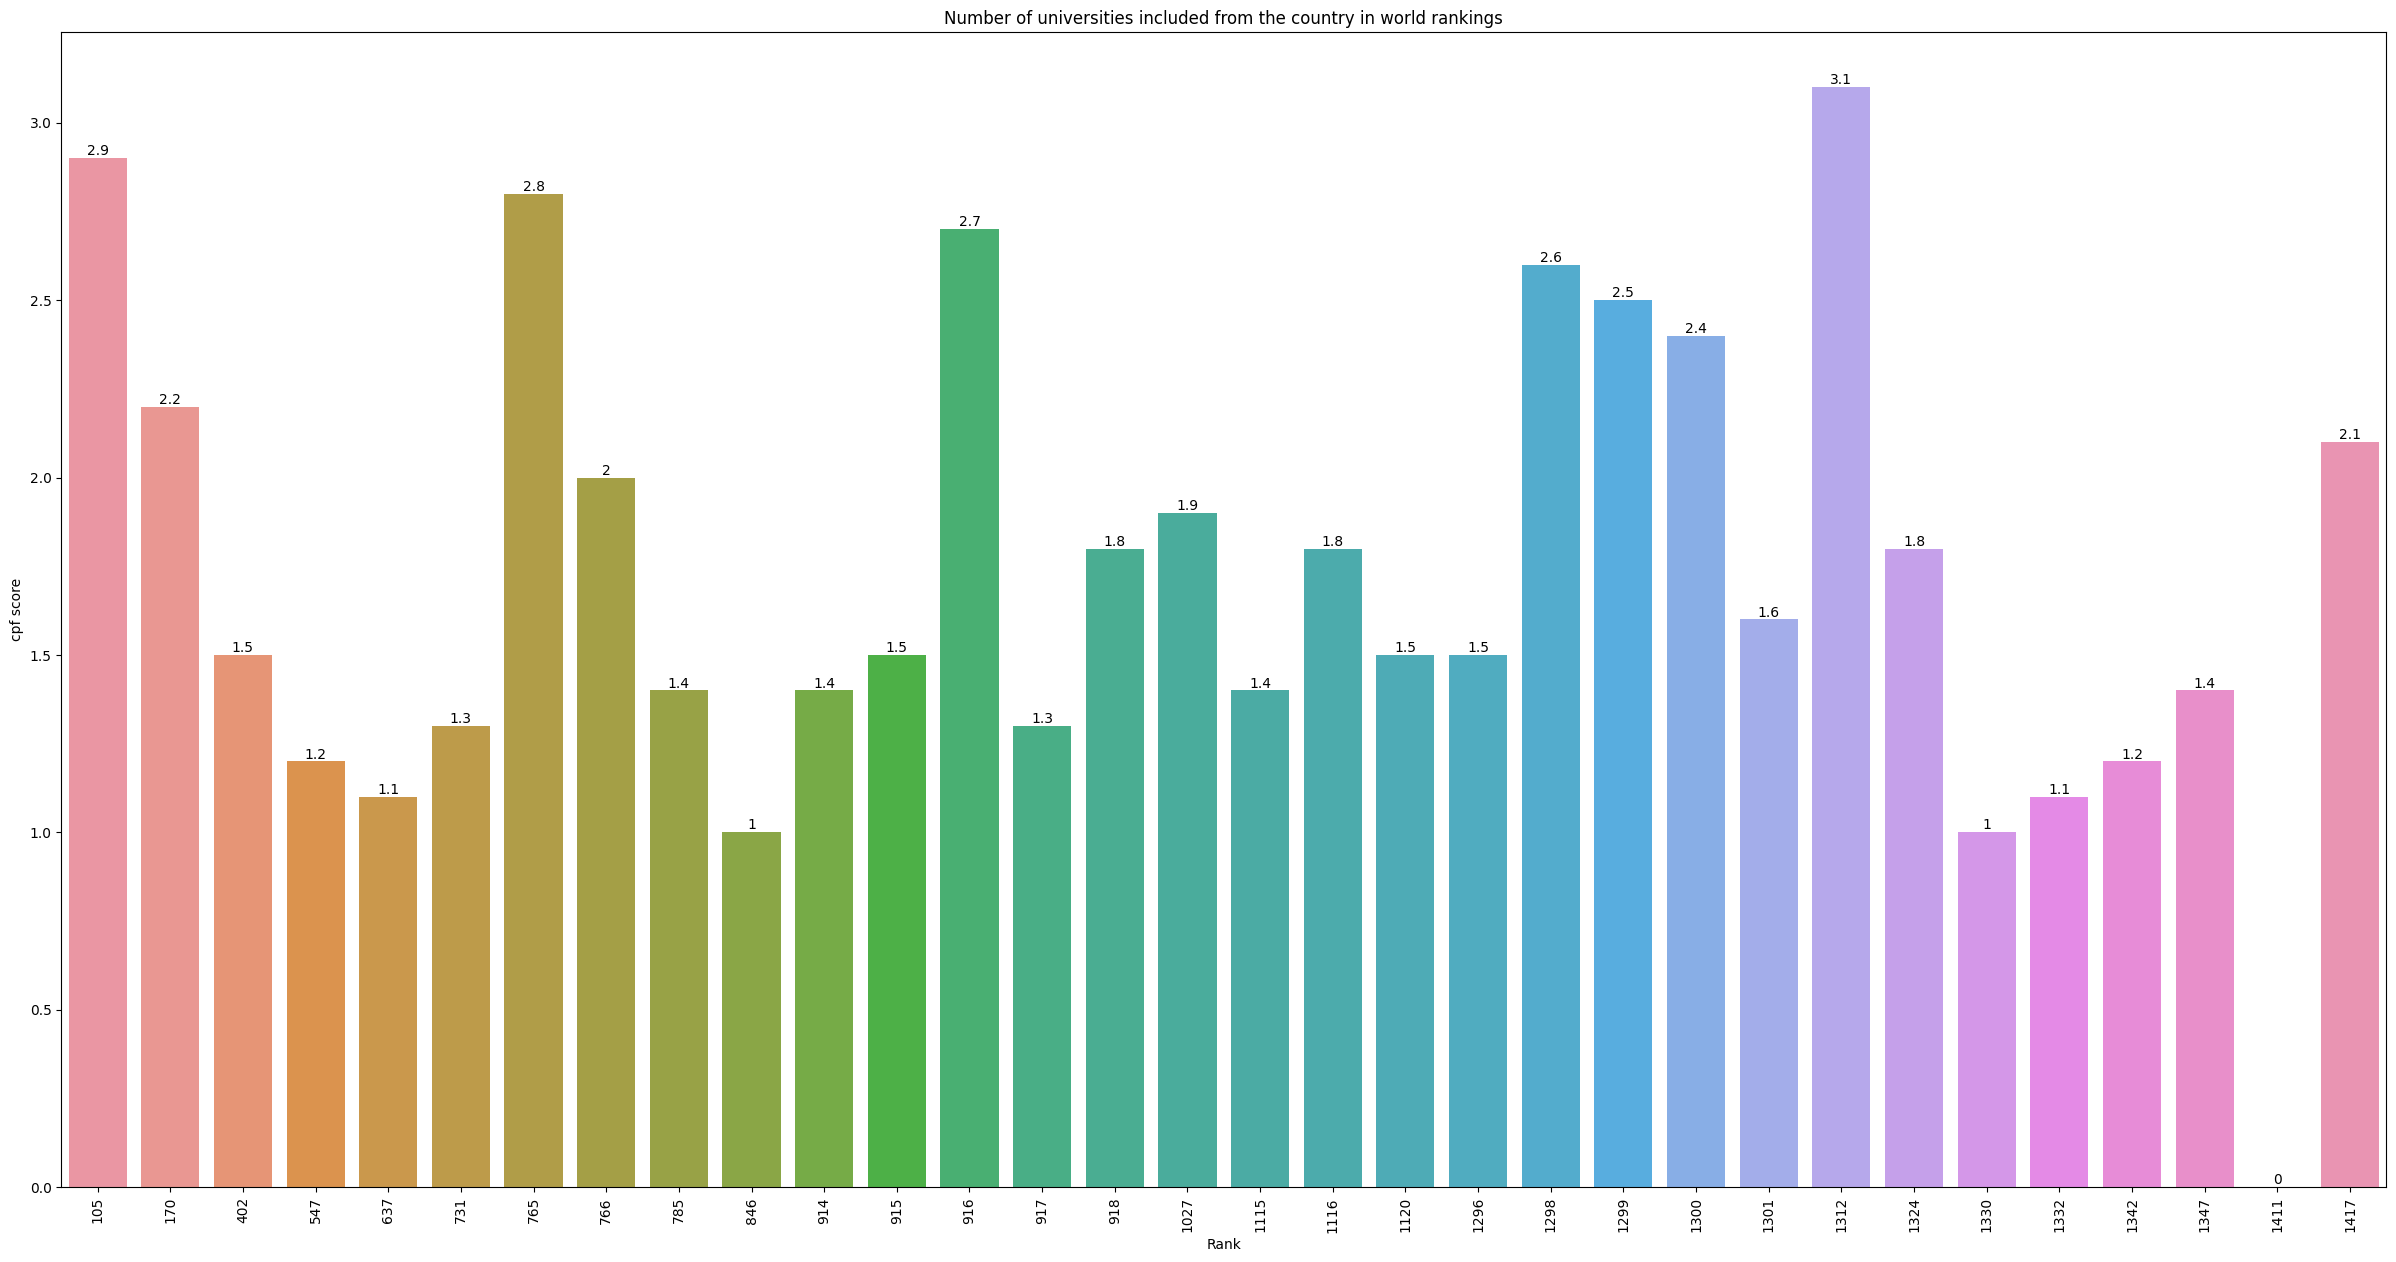

In [ ]:


plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.title('Number of universities included from the country in world rankings')
ax = sns.barplot(x='Rank', y='cpf score',data=mx)
ax.bar_label(ax.containers[0])



# Nuevo

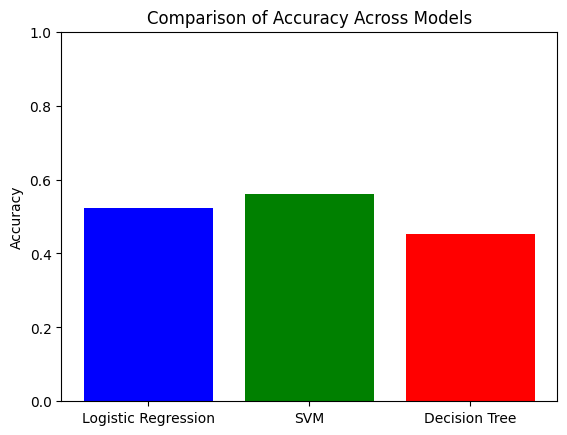

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [accuracy_logistic, accuracy_svm, accuracy_dt]

# Crear un gráfico de barras
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Across Models')
plt.ylim([0, 1])  # Establecer el límite del eje y entre 0 y 1 (porcentaje)
plt.show()


In [ ]:
print("La Accuracy del modelo de Logistic Regression con tres variables es:", accuracy_logistic)
print("La Accuracy del modelo de Logistic Regression con dos variables es:", accuracy_logistic2)
print("La Accuracy del modelo de Support Vector Machine con tres variables es:", accuracy_svm)
print("La Accuracy del modelo de Support Vector Machine con dos variables es:", accuracy_svm2)
print("La Accuracy del modelo de Decision Tree con tres variables es:", accuracy_dt)
print("La Accuracy del modelo de Decision Tree con dos variables es:", accuracy_dt2)


La Accuracy del modelo de Logistic Regression con tres variables es: 0.5228070175438596
La Accuracy del modelo de Logistic Regression con dos variables es: 0.7929824561403509
La Accuracy del modelo de Support Vector Machine con tres variables es: 0.5614035087719298
La Accuracy del modelo de Support Vector Machine con dos variables es: 0.7964912280701755
La Accuracy del modelo de Decision Tree con tres variables es: 0.45263157894736844
La Accuracy del modelo de Decision Tree con dos variables es: 0.3263157894736842


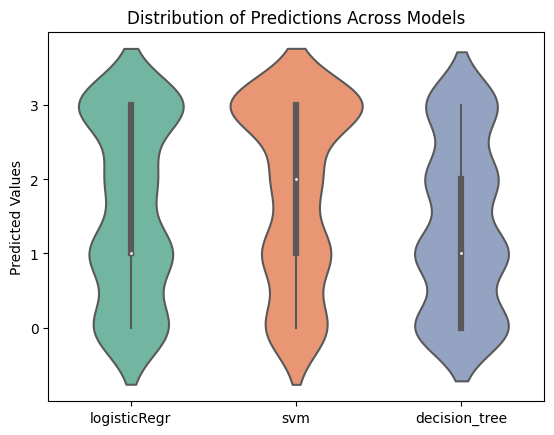

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions = [y_pred_logistic, y_pred_svm, y_pred_dt]
models = ['logisticRegr', 'svm', 'decision_tree']

sns.violinplot(data=predictions, palette='Set2')
plt.xticks(range(3), models)
plt.ylabel('Predicted Values')
plt.title('Distribution of Predictions Across Models')
plt.show()


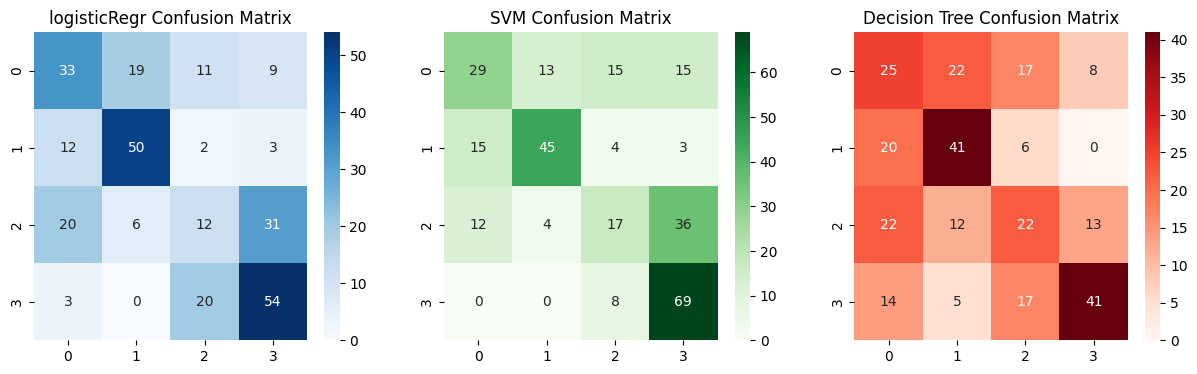

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[0])
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', ax=axes[2])

axes[0].set_title('logisticRegr Confusion Matrix')
axes[1].set_title('SVM Confusion Matrix')
axes[2].set_title('Decision Tree Confusion Matrix')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

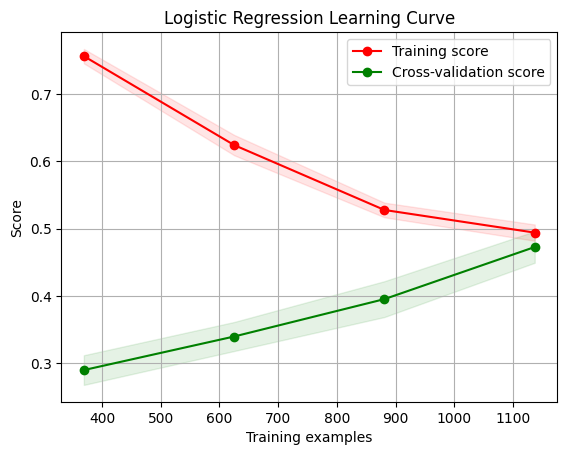

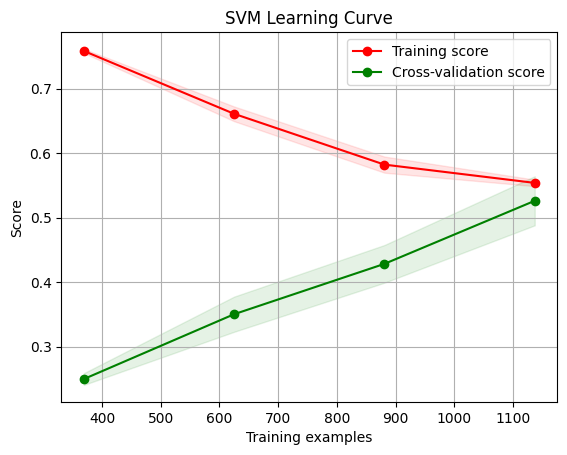

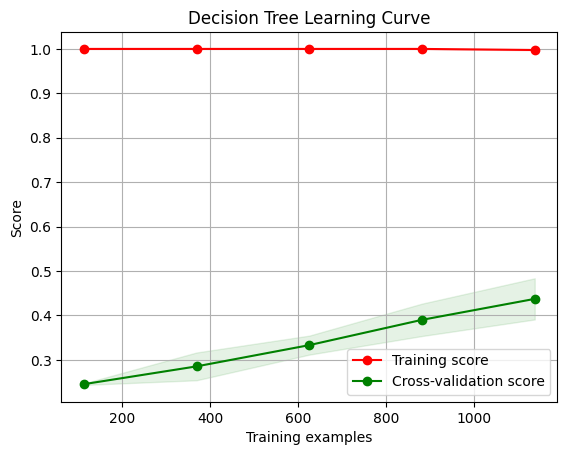

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Usar la función para cada modelo
plot_learning_curve(logisticRegr, "Logistic Regression Learning Curve", X, y, cv=5)
plot_learning_curve(svm, "SVM Learning Curve", X, y, cv=5)
plot_learning_curve(decision_tree, "Decision Tree Learning Curve", X, y, cv=5)

plt.show()


# Redes neuronales

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Definir intervalos y etiquetas
intervalos = [1, 350, 700, 1050, float('inf')]  # Define tus intervalos según tus criterios
etiquetas = ['Excelentes', 'Buen nivel', 'Mah o meno', 'Regular']  # Define las etiquetas para cada intervalo

# Crear la variable objetivo basada en los intervalos
dfclean['clasificacion'] = pd.cut(dfclean['Rank'], bins=intervalos, labels=etiquetas)

# Codificar la variable objetivo ('clasificacion')
le = LabelEncoder()
dfclean['label'] = le.fit_transform(dfclean['clasificacion'])

Xred = dfclean.drop("institution", axis=1)
Xred = Xred.drop("Rank", axis=1)
Xred = Xred.drop("location code", axis=1)
Xred = Xred.drop("score scaled", axis=1)
Xred = Xred.drop("location", axis=1)
X2= Xred.drop("clasificacion", axis=1)
X2 = X2.drop("label", axis=1)
Y2 = dfclean["label"]


# Paso 1: Preprocesamiento de datos
features = X2
target = Y2

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paso 2: Construir el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # '4' es el número de clases
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Paso 3: Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Paso 4: Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_accuracy}')

# Obtener predicciones
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Imprimir el informe de clasificación
print('\nClassification Report:')
print(classification_report(y_test, predicted_labels))



Epoch 1/10
36/36 [==============================] - 3s 25ms/step - loss: 1.4396 - accuracy: 0.3835 - val_loss: 1.2551 - val_accuracy: 0.5860
Epoch 2/10
36/36 [==============================] - 0s 7ms/step - loss: 1.0720 - accuracy: 0.6130 - val_loss: 0.8930 - val_accuracy: 0.6421
Epoch 3/10
36/36 [==============================] - 1s 18ms/step - loss: 0.7334 - accuracy: 0.7238 - val_loss: 0.6525 - val_accuracy: 0.7368
Epoch 4/10
36/36 [==============================] - 1s 24ms/step - loss: 0.5402 - accuracy: 0.8276 - val_loss: 0.5096 - val_accuracy: 0.7965
Epoch 5/10
36/36 [==============================] - 1s 17ms/step - loss: 0.4316 - accuracy: 0.8487 - val_loss: 0.4355 - val_accuracy: 0.8105
Epoch 6/10
36/36 [==============================] - 1s 20ms/step - loss: 0.3667 - accuracy: 0.8786 - val_loss: 0.3893 - val_accuracy: 0.8281
Epoch 7/10
36/36 [==============================] - 1s 16ms/step - loss: 0.3204 - accuracy: 0.8901 - val_loss: 0.3652 - val_accuracy: 0.8421
Epoch 8/10
36/